# A.- PURPOSE

This document provides the details of my final project for the assignment to the Certificate program – Coursera Capstone - week 4

# B.- INTRODUCTION

A small and dreamer investor asked me about the feasibility to open a crafted coffee and bakery store, he has would like to know which are the main cities (based on density) in South Florida in which you could open your store, but you also want to know about his possible competitors like coffee shops similar to Starbucks are present in the area in order to know if that kind of business is popular in those areas.

My intention as Data Science is to collect and provide data-driven facts and supplement and support his decision

This notebook will try to show and provide the pieces of information about the areas in which he could open his coffeehouse and for this demonstration

# C.- DATA SOURCES

To this project, I will use the data of FourSquare and Wikipedia as main sources.

I will use the FourSquare API to explore neighborhoods, venues and so on to get information about coffeehouse chain shops like Starbucks and use it to group the neighborhoods into clusters. The following information is retrieved on the query:

Venue ID
Venue Name
Coordinates: Latitude and Longitude
Category Name

On Wikipedia, I will use the list of counties in Florida to get the information and discover which are the first three counties which more population. The following information is retrieved on the query:

Population
Density
Area

# Install all packages needed

In [2]:
!pip install beautifulsoup4 #Install the library to scrape the wiki website
!pip install lxml #Install the parser recommended
!pip install request #Install request to get info from www
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

     |████████████████████████████████| 102kB 24.2MB/s ta 0:00:01
     |████████████████████████████████| 5.8MB 28.2MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/30/84/5f/484cfba678967ef58c16fce6890925d5c7172622f20111fbfd
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c1/e3/c1/d02c8c58538853e4c9b78cadb74f6d5c5c370b48a69a7271aa
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c3/c3/24/b5c132b537ab380c02d69e6bd4dec1f5db56b5fe19030473d7
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d6/a4/78/01b20a9dc224dcc009fab669f7f27b943b8889c5150bd68d8a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/23/7c/6e/f5b4e09d6596c8b8802b347e48f149031e2363368048f1347a
Successfully built request get post query-string public
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All reque

### Importing function and libraries

In [3]:
import requests  as myrq # library for requests
import lxml.html as mylh # library for handle html from wiki
from bs4 import BeautifulSoup #library for scraping web
import numpy as mynp # library to handle data in a vector
import pandas as mypd # library for data analsysis
import random # library for random number generation
import matplotlib.pyplot as plt # plotting library
 # backend for rendering plots within the browser
%matplotlib inline
from sklearn.cluster import KMeans # import k-means from clustering stage
import folium # map rendering library
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#Enable Intellisense
%config IPCompleter.greedy=True

### Getting the whole html information from web

In [4]:
def getHtmlfromweb (Url):
    mysource = myrq.get(Url).text #  Html text unreadable
    mysource = BeautifulSoup(mysource, 'lxml') # return a readable html
    return mysource

### Get all rows with from wikidatatable 

In [5]:
def getRowArrywikihtml(HmltWikiDataTable):
    htmltablerowsheader = HmltWikiDataTable.find_all('th')
    htmltablerows = HmltWikiDataTable.find_all('tr')
    dataArray = []
    for row in htmltablerows:
        td=[]
        TheaderRow = row.find('th').text.strip() # get the a href tag 
        td.append(TheaderRow)
       # print (TheaderRow)
        for t in row.find_all('td'):
            td.append(t.text.strip())
        dataArray.append(td)
    return dataArray

### Convert from array to panda

In [6]:
def FromArrayToPandaDF (SourceArray,Columns):
       return mypd.DataFrame(SourceArray, columns=Columns) 

### Data from wikipedia: Counties information

In [7]:
Url = 'https://en.wikipedia.org/wiki/List_of_counties_in_Florida'
HtmlDataCountiesTable = getHtmlfromweb (Url)
HtmlDataCountiesTable = HtmlDataCountiesTable.find('table',{'class':'wikitable sortable'}) # Getting the html target table

### Transform from array to PandaDataFrame

In [8]:
dataArray = getRowArrywikihtml(HtmlDataCountiesTable)
floridaDF = FromArrayToPandaDF (dataArray,['County','Code FIPS','County Seat','Est',
                                           'Formed From','Etymology','Density','Population','Area','Map'])
floridaDF.head(20)

,County,Code FIPS,County Seat,Est,Formed From,Etymology,Density,Population,Area,Map
0,County,None,None,None,None,None,None,None,None,None
1,Alachua County,001,Gainesville,1824,Duval and St. Johns,"From a Seminole-Creek word meaning ""jug"", appa...",285.31,"249,365","874 sq mi(2,264 km2)",
2,Baker County,003,Macclenny,1861,New River,"James McNair Baker (1821–1892), a Confederate ...",46.42,"27,154","585 sq mi(1,515 km2)",
3,Bay County,005,Panama City,1913,Calhoun and Washington,"St. Andrew's Bay, the central geographic featu...",222.32,"169,856","764 sq mi(1,979 km2)",
4,Bradford County,007,Starke,1858,Columbianamed New River until 1861,"Richard Bradford, the first officer from Flori...",96.43,"28,255",293 sq mi(759 km2),
5,Brevard County,009,Titusville,1844,Hillsborough and Mosquitonamed St. Lucie until...,"Theodore Washington Brevard, early settler and...",533.95,"543,566","1,018 sq mi(2,637 km2)",
6,Broward County,011,Fort Lauderdale,1915,Dade and Palm Beach,"Napoleon Bonaparte Broward (1857–1910), 19th g...",1472.43,"1,780,172","1,209 sq mi(3,131 km2)",
7,Calhoun County,013,Blountstown,1838,"Franklin, Jackson, and Washington",John C. Calhoun (1782–1850) leading Southern p...,26.01,"14,750","567 sq mi(1,469 km2)",
8,Charlotte County,015,Punta Gorda,1921,DeSoto,Probably a corruption of the name of the Calus...,231.28,"160,511","694 sq mi(1,797 km2)",
9,Citrus County,017,Inverness,1887,Hernando,The county's citrus trees,239.78,"140,031","584 sq mi(1,513 km2)",


### Cleaning the column that no longer needed

In [9]:
mydf = floridaDF
mydf.drop(['Code FIPS','County Seat','Est','Formed From','Etymology','Area','Map'], axis=1 ,inplace=True)
mydf = mydf.drop([0])

### Plotter de density by county

In [10]:
def horizonalgraphbar(DataInfo,title, sortValue,Xlabel, Ylabel, indextoplot,topN):
    
    df_barh_target = mypd.DataFrame(DataInfo)  
    df_barh_target = DataInfo
    df_barh_target.set_index (indextoplot,inplace=True)
    df_barh_target = df_barh_target.nlargest (topN,sortValue)
    df_barh_target = df_barh_target.sort_values(by=sortValue, ascending=True)
    ax = df_barh_target.plot(
        kind='barh', 
        figsize=(12, 6),
        width=0.8,
        color='darkblue',
        alpha=0.4,
        edgecolor=None)
    
    ax.set_title(title, fontsize=12)
    plt.ylabel(Ylabel)
    plt.xlabel(Xlabel)
    ax.legend().set_visible(True)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    ax.get_yaxis().set_visible(True)
    ax.get_xaxis().set_visible(False)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:}'.format(width),
                    (p.get_x() + 1.02*width,
                     p.get_y() + 0.25*height),
                     ha = 'left',
                     color='black',
                     fontsize=9)
    

### Data wrangling

In [11]:
def dejar_solo_cifras(txt):
  return "".join(c for c in txt if c.isdigit())


mydf.Population = mydf.Population.map(dejar_solo_cifras)
mydf.Density = mydf.Density.map(dejar_solo_cifras)

floatvalue = mydf["Population"].astype("float")
mydf["Population"]= floatvalue
floatvalue1 = mydf["Density"].astype("float")
mydf["Density"]= floatvalue1
mydf["County"]= mydf["County"].str.replace('County','')
mydf.head(20)

,County,Density,Population
1,Alachua,28531.0,249365.0
2,Baker,4642.0,27154.0
3,Bay,22232.0,169856.0
4,Bradford,9643.0,28255.0
5,Brevard,53395.0,543566.0
6,Broward,147243.0,1780172.0
7,Calhoun,2601.0,14750.0
8,Charlotte,23128.0,160511.0
9,Citrus,23978.0,140031.0
10,Clay,32008.0,192370.0


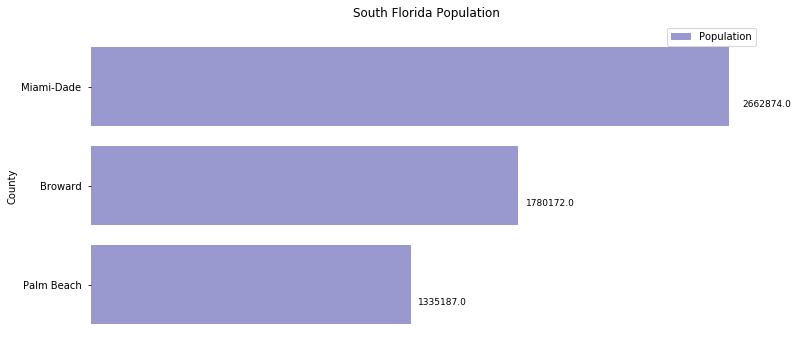

In [12]:
#plot the graphics with top 5 cities
TopNCities = 3
OrderValue = 'Population'
horizonalgraphbar(mydf[["County","Population"]],'South Florida Population',OrderValue ,'Population',
            'County','County',TopNCities) 
mydf = mydf.nlargest (TopNCities,OrderValue)

### Get Coordinates from address

In [13]:
def getCoordinateFromaddress(address):
    addressLoc = address
    geolocator = Nominatim(user_agent="Address_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinate of ' + address + '  are {}, {}.'.format(latitude, longitude))
    return latitude,longitude

In [14]:
#Get coordinate to each city
CoordinateCityLat=[]
CoordinateCityLon=[]
for ncities in mydf.County:
    mylat,mylon = getCoordinateFromaddress(ncities)
    CoordinateCityLat.append (mylat)
    CoordinateCityLon.append (mylon)
mydf["Lat"]= CoordinateCityLat
mydf["Lon"]= CoordinateCityLon
mydf

,County,Density,Population,Lat,Lon
43,Miami-Dade,131350.0,2662874.0,25.636425,-80.498947
6,Broward,147243.0,1780172.0,26.159807,-80.462364
50,Palm Beach,65643.0,1335187.0,26.627980,-80.449417


### Create map of cities using latitude and longitude values, and render it with folium

In [15]:
def createCityFoliumMAp(mydfgeodata,Location,pointcolor):
    address = Location
    geolocator = Nominatim(user_agent="Map_Explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(AddressLocat,latitude, longitude))
    map_Cities = folium.Map(location=[latitude, longitude], zoom_start=8)
    
    # add markers to map
    for lat, lng, County, Population in zip(mydfgeodata['Lat'], mydfgeodata['Lon'], 
                                                   mydfgeodata['County'], mydfgeodata['Population']):
        label = '{}, Population {:,}'.format(County, Population)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color= pointcolor,
            fill_opacity=0.7,
            parse_html=False).add_to(map_Cities)  
    return map_Cities

In [16]:
AddressLocat = 'Miami, USA'
createCityFoliumMAp (mydf,AddressLocat,'#3186cc')

The geograpical coordinate of Miami, USA are 25.7742658, -80.1936589.


### FourSquare Information and this Function that extracts the category of the venue

In [17]:
# @hidden_cell
def FourSquareInformation(lat,lng,county):
    CLIENT_ID = 'SJKE1OH0FGMJQJUI5PWEMJT2C1MKK0IG2HHXMHRUCGGEU2LM' # your Foursquare ID
    CLIENT_SECRET = 'IIID2UGPF1QVHND5JQFIUMDUXGDRURZX21QAYRGS4Z3FLNSV' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    LIMIT = 200 # limit of number of venues returned 
    RADIUS = 20000 # define radius
    myCounty = county.strip()
    mylat = lat
    mylng = lng
    #Url Query coodinates
    #Url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,mylat,mylng,RADIUS, LIMIT)
    #Url Location
    Url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,county.strip(),RADIUS, LIMIT)
    # get data from foursquare 
    results = myrq.get(Url).json()
    venuedata= results["response"]['groups'][0]['items']
    venueArray=[]
    for row in venuedata:
        try:
            idvenue=row['venue']['id']
            namevenue=row['venue']['name']
            categoryvenue=row['venue']['categories'][0]['name']
            latvenue=row['venue']['location']['lat']
            lngvenue=row['venue']['location']['lng']
            Addressvenue= row['venue']['location']['address'] 
            venueArray.append([county,idvenue,namevenue,categoryvenue,latvenue,lngvenue,Addressvenue])
        except KeyError:
            pass
    column_names=['County','ID','Name','Category','lat','lng','Address']
    Resultdf = mypd.DataFrame(venueArray,columns=column_names)
    return Resultdf

### Get information from foursquare query

In [18]:
MyDfResults = mypd.DataFrame()
for Lat,Lng,County in zip(mydf['Lat'], mydf['Lon'], mydf['County']):     
    MyDfResults = mypd.concat([MyDfResults, FourSquareInformation (Lat,Lng, County)],ignore_index=True)    
MyDfResults.head(50)

,County,ID,Name,Category,lat,lng,Address
0,Miami-Dade,51168e25e4b05b41eca9496d,Isaac Farms,Farm,25.589987,-80.479187,18800 SW 177th Ave
1,Miami-Dade,4b118d49f964a520217f23e3,Publix,Grocery Store,25.682986,-80.464437,16800 SW 88th St
2,Miami-Dade,4ba55351f964a520e9fa38e3,La Perla Peruvian Restaurant,Peruvian Restaurant,25.625077,-80.415334,13742 SW 152nd St
3,Miami-Dade,4bd4a611637ba593b127f570,Publix,Grocery Store,25.597003,-80.430832,18300 SW 147th Ave
4,Miami-Dade,564a2aa0498e4c6c5736380b,"MOOYAH Burgers, Fries & Shakes",American Restaurant,25.627312,-80.415057,13725 SW 152nd St.
5,Miami-Dade,4d40bfb2bd53f04d4b3f4715,X-treme Rock Climbing,Gym,25.637666,-80.420645,13972 SW 139th Ct
6,Miami-Dade,4b8c1427f964a52095bc32e3,Fruit & Spice Park,Park,25.535183,-80.493818,24801 SW 187th Ave
7,Miami-Dade,4c30b19fa0ced13af97c126e,Zoo Miami,Zoo,25.611152,-80.398164,12400 SW 152nd St
8,Miami-Dade,581f5d80001d871478464383,"Bonjour Bakery ""The real French touch!""",Bakery,25.682823,-80.460980,16650 SW 88th St #104
9,Miami-Dade,4b379f16f964a5202a4325e3,Costco,Warehouse Store,25.653709,-80.412326,13450 SW 120th St


In [19]:
MyDfResults.to_csv('Coffeevenues.csv') # Save the information
MyDfResults = mypd.read_csv('Coffeevenues.csv') # get the information

In [20]:
CoffeShops=MyDfResults[MyDfResults['Category']=='Coffee Shop']  

In [21]:
CoffeShops

,Unnamed: 0,County,ID,Name,Category,lat,lng,Address
43,43,Miami-Dade,4b23b959f964a520975824e3,Starbucks,Coffee Shop,25.656082,-80.396311,12512 SW 120th St
45,45,Miami-Dade,4b491b4af964a5201e6626e3,Starbucks,Coffee Shop,25.684782,-80.415240,13604 N Kendall Dr
49,49,Miami-Dade,4ba68762f964a520595b39e3,Starbucks,Coffee Shop,25.684432,-80.456718,16305 SW 88th St
87,87,Miami-Dade,4b43fa59f964a52089ef25e3,Starbucks,Coffee Shop,25.729099,-80.428006,14401 SW 42nd Street
103,103,Broward,4aca6578f964a520bec120e3,Starbucks,Coffee Shop,26.118198,-80.392763,310 Indian Trce
135,135,Broward,4b989284f964a520544735e3,Panna express,Coffee Shop,26.085816,-80.370859,2620 Weston Rd
178,178,Broward,4b40a037f964a52067b925e3,Starbucks,Coffee Shop,26.065390,-80.363010,4503 Weston Rd
219,219,Palm Beach,5315dd9c498e1fd749743356,Sub Culture Coffee,Coffee Shop,26.713478,-80.055814,509 Clematis St
249,249,Palm Beach,4b33a3c8f964a520f01b25e3,Starbucks,Coffee Shop,26.705902,-80.079880,1870 Okeechobee Blvd


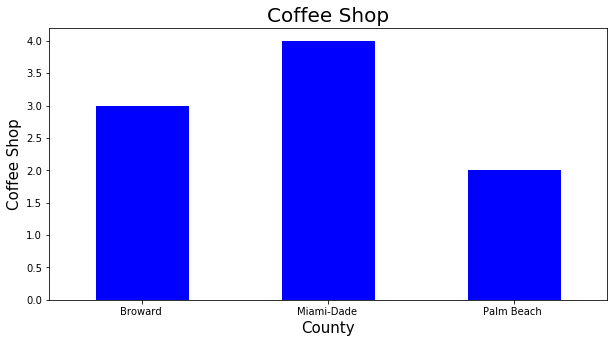

In [22]:
CoffeShops.groupby('County')['ID'].count().plot.bar(figsize=(10,5), color = 'b')
plt.title('Coffee Shop', fontsize = 20)
plt.xlabel('County', fontsize = 15)
plt.ylabel('Coffee Shop', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [23]:
geolocator = Nominatim(user_agent="Map_Explorer_CoffeShops")
location = geolocator.geocode(AddressLocat)
map_Cities = folium.Map(location=[location.latitude, location.longitude], zoom_start=8)
# add markers to map
for lat, lng, County, Name, AddressVen in zip(CoffeShops['lat'], CoffeShops['lng'], CoffeShops['County'], 
                                              CoffeShops['Name'], CoffeShops['Address']): 
    label = 'Name {}, Address {}'.format(Name, AddressVen)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color= 'blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Cities)  
map_Cities
